In [4]:
# import os
# import matplotlib.pyplot as plt
# os.environ.setdefault("DJANGO_SETTINGS_MODULE", "resume_scanner.settings")
# os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

# import django
# django.setup()

# from django.core.management import call_command
import json
from nltk.corpus import stopwords
import pandas as pd
import pickle
import re
import seaborn as sns
import sklearn.mixture
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [5]:
combined_df = pd.read_pickle('combined.pkl')
unified_combined_df = pd.read_pickle('unified_combined.pkl')
seg_scan_swipe_df = pd.read_pickle('seg_scan_swipe.pkl')
unified_col_seg_df = pd.read_pickle('unified_col_seg.pkl')

dfs = [combined_df, unified_combined_df, seg_scan_swipe_df, unified_col_seg_df]

In [6]:
transformed_dfs = []
for df in dfs:
    pca = PCA(n_components=0.95)
    transformed_dfs.append(pd.DataFrame(pca.fit_transform(df.drop(columns=['like']))))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


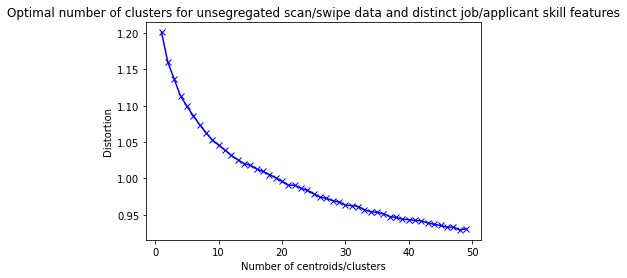

In [6]:
distortions = []
K = range(1,50)
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k).fit(transformed_dfs[0])
    kmeanModel.fit(transformed_dfs[0])
    distortions.append(sum(np.min(
        cdist(transformed_dfs[0], kmeanModel.cluster_centers_, 'euclidean'
    ), axis=1)) / transformed_dfs[0].shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of centroids/clusters')
plt.ylabel('Distortion')
plt.title('Optimal number of clusters for unsegregated scan/swipe data and distinct job/applicant skill features')
plt.show()

## 14 clusters

10
20
30


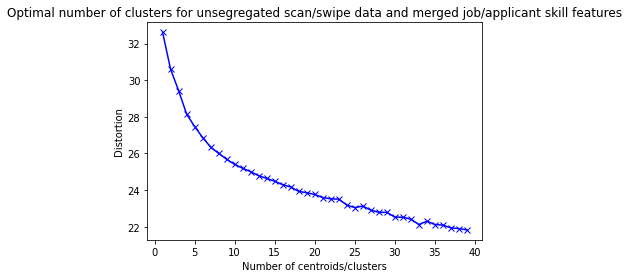

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,40)
for k in K:
    if k % 10 == 0:
        print(k)
    kmeanModel = KMeans(n_clusters=k).fit(transformed_dfs[1])
    kmeanModel.fit(transformed_dfs[1])
    distortions.append(sum(np.min(
        cdist(transformed_dfs[1], kmeanModel.cluster_centers_, 'euclidean'
    ), axis=1)) / transformed_dfs[1].shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of centroids/clusters')
plt.ylabel('Distortion')
plt.title('Optimal number of clusters for unsegregated scan/swipe data and merged job/applicant skill features')
plt.show()

## 7 clusters

10
20
30


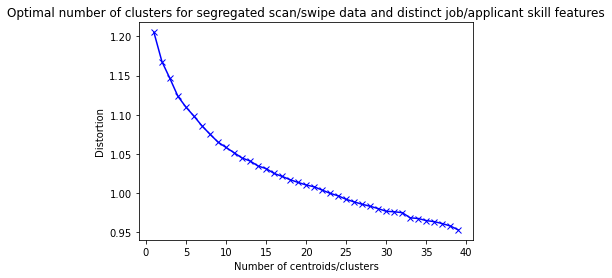

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,40)
for k in K:
    if k % 10 == 0:
        print(k)
    kmeanModel = KMeans(n_clusters=k).fit(transformed_dfs[2])
    kmeanModel.fit(transformed_dfs[2])
    distortions.append(sum(np.min(
        cdist(transformed_dfs[2], kmeanModel.cluster_centers_, 'euclidean'
    ), axis=1)) / transformed_dfs[2].shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of centroids/clusters')
plt.ylabel('Distortion')
plt.title('Optimal number of clusters for segregated scan/swipe data and distinct job/applicant skill features')
plt.show()

## 10 clusters

10
20
30


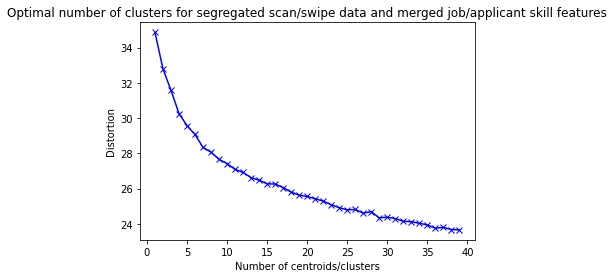

In [9]:
distortions = []
K = range(1,40)
for k in K:
    if k % 10 == 0:
        print(k)
    kmeanModel = KMeans(n_clusters=k).fit(transformed_dfs[3])
    kmeanModel.fit(transformed_dfs[3])
    distortions.append(sum(np.min(
        cdist(transformed_dfs[3], kmeanModel.cluster_centers_, 'euclidean'
    ), axis=1)) / transformed_dfs[3].shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of centroids/clusters')
plt.ylabel('Distortion')
plt.title('Optimal number of clusters for segregated scan/swipe data and merged job/applicant skill features')
plt.show()

## 8 clusters

<AxesSubplot:>

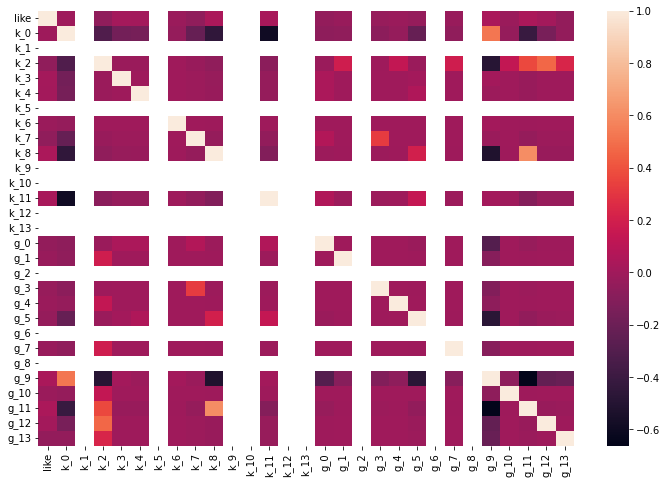

In [15]:
combined_pred = transformed_dfs[0].copy(deep=True)
combined_pred['kmeans'] = KMeans(n_clusters=14).fit_predict(transformed_dfs[0])

gaussmix = sklearn.mixture.GaussianMixture(n_components = 14, covariance_type='full', random_state=123)
gaussmix.fit(transformed_dfs[0])
combined_pred['gauss'] = gaussmix.predict(transformed_dfs[0])

combined_pred['like'] = combined_df['like']

combined_ohe = pd.concat([
    combined_pred.like, pd.get_dummies(combined_pred.kmeans, prefix='k'),
    pd.get_dummies(combined_pred.gauss, prefix='g')
], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(combined_ohe[~combined_ohe['like'].isna()].corr())

<AxesSubplot:>

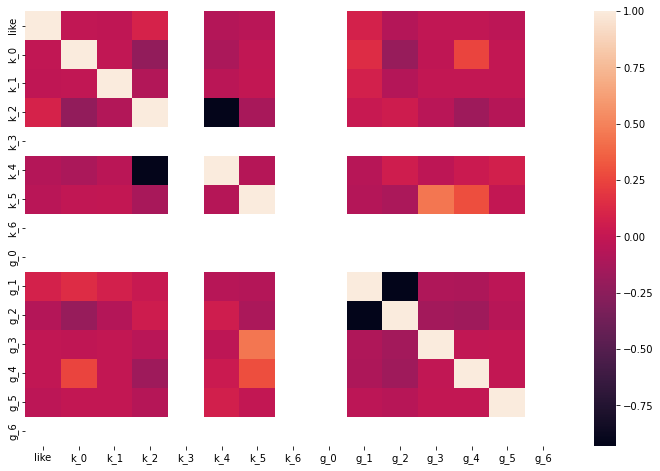

In [16]:
unified_combined_pred = transformed_dfs[1].copy(deep=True)
unified_combined_pred['kmeans'] = KMeans(n_clusters=7).fit_predict(transformed_dfs[1])

gaussmix = sklearn.mixture.GaussianMixture(n_components = 7, covariance_type='full', random_state=123)
gaussmix.fit(transformed_dfs[1])
unified_combined_pred['gauss'] = gaussmix.predict(transformed_dfs[1])

unified_combined_pred['like'] = unified_combined_df['like']

unified_combined_ohe = pd.concat([
    unified_combined_pred.like, pd.get_dummies(unified_combined_pred.kmeans, prefix='k'),
    pd.get_dummies(unified_combined_pred.gauss, prefix='g')
], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(unified_combined_ohe[~unified_combined_ohe['like'].isna()].corr())

<AxesSubplot:>

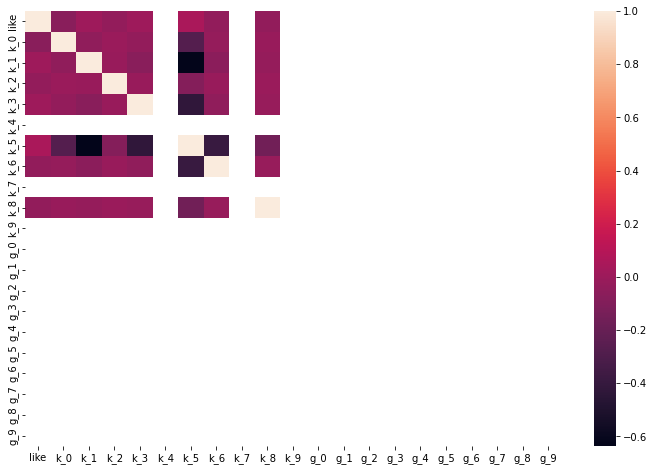

In [17]:
seg_scan_swipe_pred = transformed_dfs[2].copy(deep=True)
seg_scan_swipe_pred['kmeans'] = KMeans(n_clusters=10).fit_predict(transformed_dfs[2])

gaussmix = sklearn.mixture.GaussianMixture(n_components = 10, covariance_type='full', random_state=123)
gaussmix.fit(transformed_dfs[2])
seg_scan_swipe_pred['gauss'] = gaussmix.predict(transformed_dfs[2])

seg_scan_swipe_pred['like'] = seg_scan_swipe_df['like']

seg_scan_swipe_ohe = pd.concat([
    seg_scan_swipe_pred.like, pd.get_dummies(seg_scan_swipe_pred.kmeans, prefix='k'),
    pd.get_dummies(seg_scan_swipe_pred.gauss, prefix='g')
], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(seg_scan_swipe_ohe[~seg_scan_swipe_ohe['like'].isna()].corr())

<AxesSubplot:>

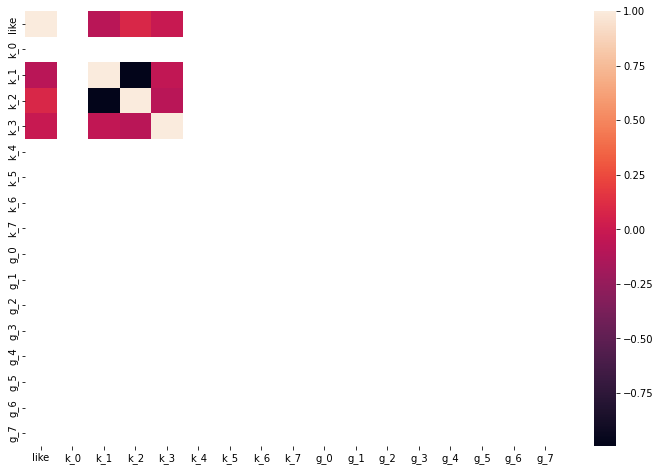

In [19]:
unified_col_seg = transformed_dfs[3].copy(deep=True)
unified_col_seg['kmeans'] = KMeans(n_clusters=8).fit_predict(transformed_dfs[3])

gaussmix = sklearn.mixture.GaussianMixture(n_components = 8, covariance_type='full', random_state=123)
gaussmix.fit(transformed_dfs[3])
unified_col_seg['gauss'] = gaussmix.predict(transformed_dfs[3])

unified_col_seg['like'] = unified_col_seg_df['like']

unified_col_seg_ohe = pd.concat([
    unified_col_seg.like, pd.get_dummies(unified_col_seg.kmeans, prefix='k'),
    pd.get_dummies(unified_col_seg.gauss, prefix='g')
], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(unified_col_seg_ohe[~unified_col_seg_ohe['like'].isna()].corr())